This is a test of a kernel-based QBC method using the IBM Qiskit Machine Learning Package. Specifically, this is a test using the Quantum Support Vector algorithm.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiskit.circuit import ParameterVector

In [35]:
#Data Generation from the moon function
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


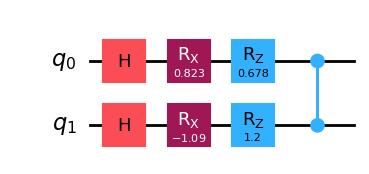

In [36]:
def feature_map():
    circuit = QuantumCircuit(2)
    for i in range(2):
        circuit.h(i)
        circuit.rx(X_train[0, i], i)
        circuit.rz(X_train[0, i]**2, i)
    circuit.cz(0, 1)
    return circuit


qc = feature_map()
qc.draw('mpl')


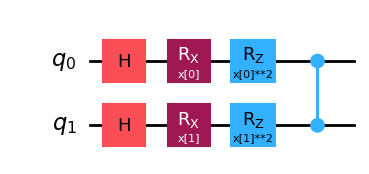

In [40]:
def feature_map():
    """Creates a parameterized 2-qubit feature map."""
    params = ParameterVector("x", length=2)
    circuit = QuantumCircuit(2)
    
    for i in range(2):
        circuit.h(i)  # Apply Hadamard
        circuit.rx(params[i], i) 
        circuit.rz(params[i]**2, i)
    
    circuit.cz(0, 1) 
    return circuit

qc = feature_map()
qc.draw('mpl')


In [39]:
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map())

qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)

# Evaluate the model
train_score = qsvc.score(X_train, y_train)
test_score = qsvc.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")


Training Accuracy: 0.68
Test Accuracy: 0.40
